<a href="https://colab.research.google.com/github/jean-ntb/Logement_Californie/blob/main/Logement_Californie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
.3# Cette cellule me servira pour les imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, datasets
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


In [2]:
# Je met en place une lecture du csv

Data_Frame = pd.read_csv("train.csv")
Data_Frame



,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


## **Etape d'exploration de la Base de données**

In [3]:
# Je m'assurer d'avoir les bons types pour chaque colonnes
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [4]:
# Pour une vision d'ensemble et pour avoird des informations clés :

Data_Frame.describe()

# medInc =  revenu médian des ménages dans le groupe de recensement en dizaine de milliers de dollars
# Age = l'âge médian des maisons dans chaque zone ou groupe de recensement.
# AveRooms : Le nombre moyen de pièces par ménage.
# veBedrms: cette colonne donne le nombre moyen de chambres à coucher par ménage.
# Population : C’est le nombre total d’habitants dans le groupe de recensement
# AveOccup : nombre moyen de personnes par ménage dans le groupe de recensement.
# MedHouseVal : C’est la valeur médiane des maisons dans chaque groupe de recensement en centaine de millers de dolals


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [5]:
# Avoir le nombre de ligne par colonne
Data_Frame.shape

(37137, 10)

# **Etape de nettoyage de la base de données**

In [6]:
# Vérification de si on a des valeurs nulls
Data_Frame.isnull().sum()


,0
id,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [7]:
# Je supprimer l'id car elle inutile
Data_Frame.drop('id', axis=1, inplace=True)


In [8]:
Data_Frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


# **Visualisation des données**

Text(0, 0.5, 'Fréquence')

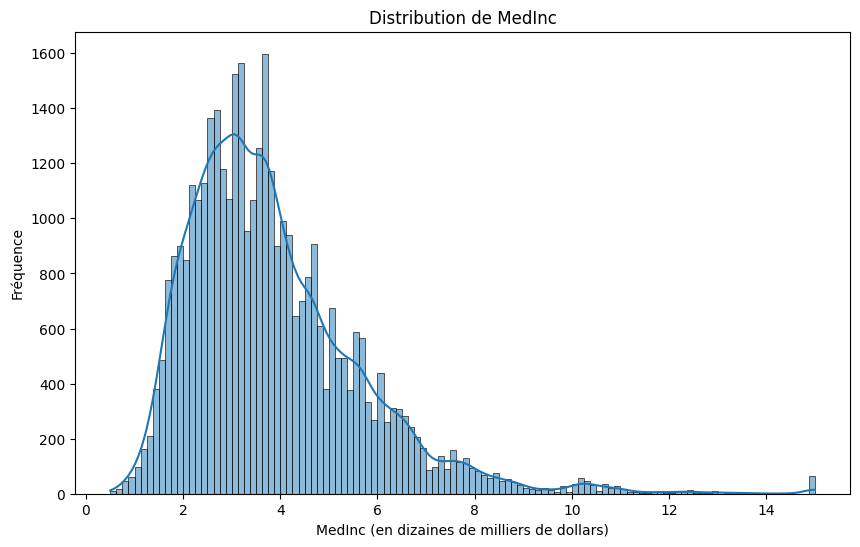

In [9]:
# Distribution des salaires médiants
plt.figure(figsize=(10, 6))
sns.histplot(Data_Frame['MedInc'], kde=True)
plt.title('Distribution de MedInc')
plt.xlabel('MedInc (en dizaines de milliers de dollars)')
plt.ylabel('Fréquence')


Text(0, 0.5, 'Fréquence')

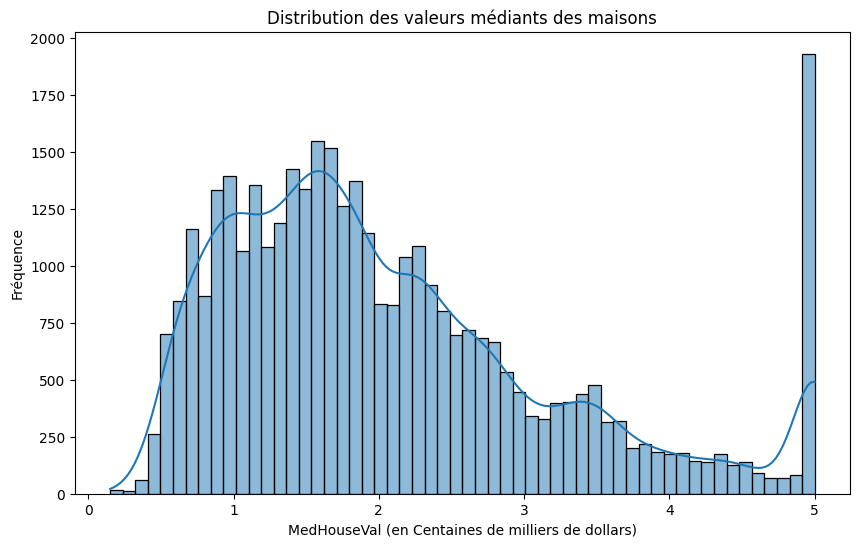

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(Data_Frame['MedHouseVal'], kde = True)
plt.title('Distribution des valeurs médiants des maisons')
plt.xlabel('MedHouseVal (en Centaines de milliers de dollars)')
plt.ylabel('Fréquence')

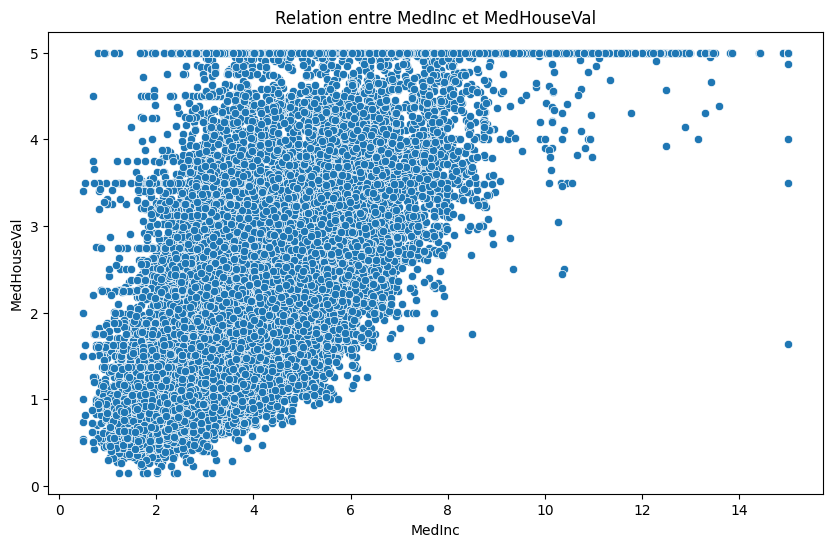

In [11]:
# Mise en relation du salaire mediant et de la valeurs médiane de maison des groupes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Data_Frame['MedInc'], y=Data_Frame['MedHouseVal'])
plt.title('Relation entre MedInc et MedHouseVal')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.show()
# J'observe que la grand majorité des valeurs medianes des maisons se trouvent dans la tranche de salaire
# entre 15000 et 80000 dollars

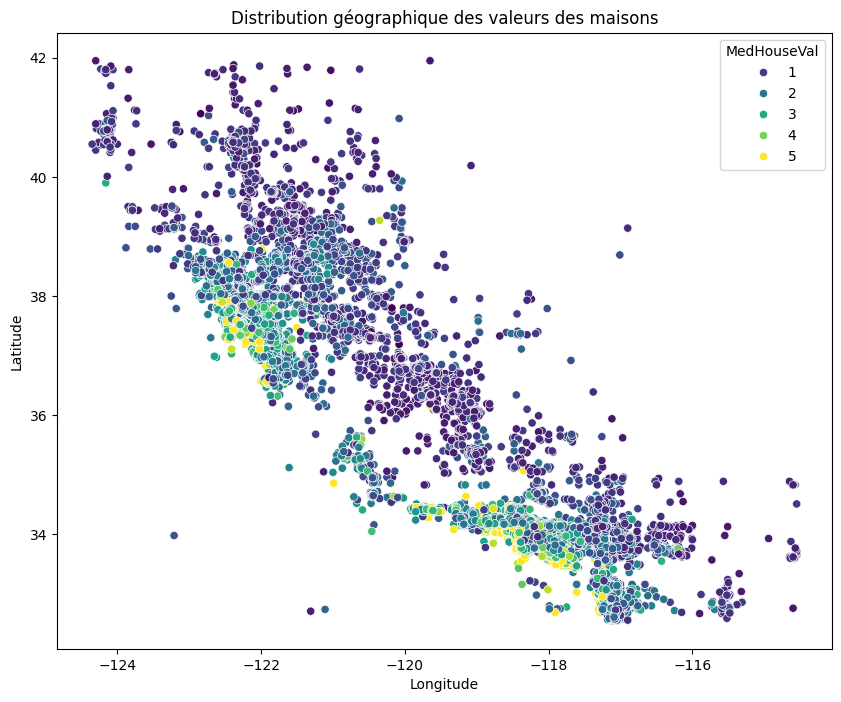

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='MedHouseVal', data=Data_Frame, palette="viridis")
plt.title('Distribution géographique des valeurs des maisons')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='MedHouseVal')
plt.show()


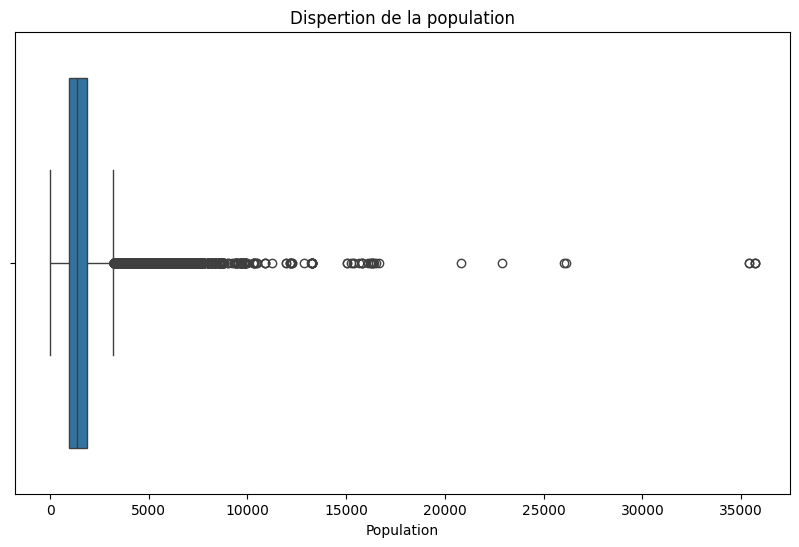

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Data_Frame['Population'])
plt.title("Dispertion de la population")
plt.xlabel("Population")
plt.show()

In [14]:
Data_Frame.describe()

# Sauvegarde de ma bdd

Data = pd.DataFrame(Data_Frame)


# **Détection de valeurs aberrantes**

In [15]:
# Détection des outliers (valeurs aberrantes) avec la méthode interquartile :

def Detect_Outliers_Iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Appliquer pour toutes les colonnes numériques
outliers = {}
for col in Data_Frame.select_dtypes(include=[np.number]).columns:
    outliers[col] = Detect_Outliers_Iqr(Data_Frame, col)
    print(f"{col} - Nombre d'outliers : {outliers[col].shape[0]}")

# Par rapport aux nombres de lignes présentes dans le jeux de données j'estime que le nombre d'oberservation
# de valeurs aberrantes n'est pas significative pour entamer un traitement de ces valeurs


MedInc - Nombre d'outliers : 1161
HouseAge - Nombre d'outliers : 0
AveRooms - Nombre d'outliers : 565
AveBedrms - Nombre d'outliers : 1609
Population - Nombre d'outliers : 2502
AveOccup - Nombre d'outliers : 1400
Latitude - Nombre d'outliers : 0
Longitude - Nombre d'outliers : 0
MedHouseVal - Nombre d'outliers : 1998


# **Etape de modélisation des données**


In [16]:
# Séparation de la variable cible (y) et des variables explicatives (X)
X = Data_Frame.drop('MedHouseVal', axis=1)
y = Data_Frame['MedHouseVal']
#  80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:


#générateur aléatoire de numpy
np.random.seed(0)

#  Création d’un pipeline avec une seule étape
Pipe = Pipeline([("regressor", RandomForestRegressor())])

Search_Space = [
    {
        'regressor': [Ridge()], # Test du modèle ridge
        'regressor__alpha': np.logspace(-3, 3, 5)  # 5 valeurs pour alpha
    },
    {
        'regressor': [RandomForestRegressor()], # Test du moèle de RandomForestRegressor
        'regressor__n_estimators': [10, 100],          # 2 valeurs pour n_estimators
        'regressor__max_features': [1, 2]              # 2 valeurs pour max_features
    }
]
Search_Space.append({
    'regressor': [XGBRegressor(objective='reg:squarederror')], #Ajout du test du modèle XGBRegressor
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [3, 5]
})

# Il va tester toutes les combinaisons définies dans Search_Space.
Grid_Search = GridSearchCV(Pipe, Search_Space, cv=5, verbose=1, n_jobs=-1)
best_model = Grid_Search.fit(X_train, y_train)

print(best_model.best_estimator_)
print("Le meilleur score est : ", best_model.best_score_)

# Je teste automatiquement plusieurs types de modèles, avec différents réglages, et je choisis celui qui donne les meilleures prédictions sur mes données

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Pipeline(steps=[('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None

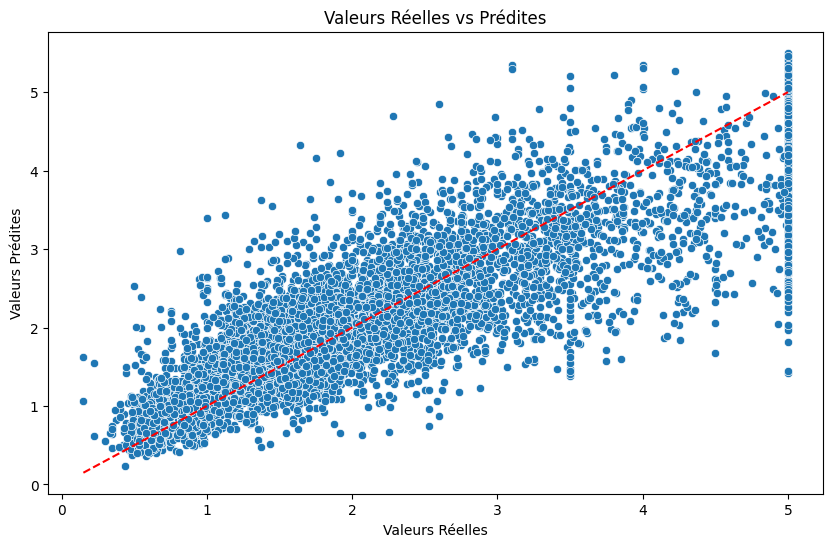

In [18]:
y_pred = best_model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("Valeurs Réelles vs Prédites")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.show()
